## Man or Women Classifier by Dimuthu Lakshan




In [39]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer,Conv2D,MaxPooling2D
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator

### construct path for data import


In [18]:
base_dir = '../data/'
man_dir = os.path.join(base_dir,'man')
women_dir = os.path.join(base_dir,'woman')

print(base_dir)
print(man_dir)
print(women_dir)

../data/
../data/man
../data/woman


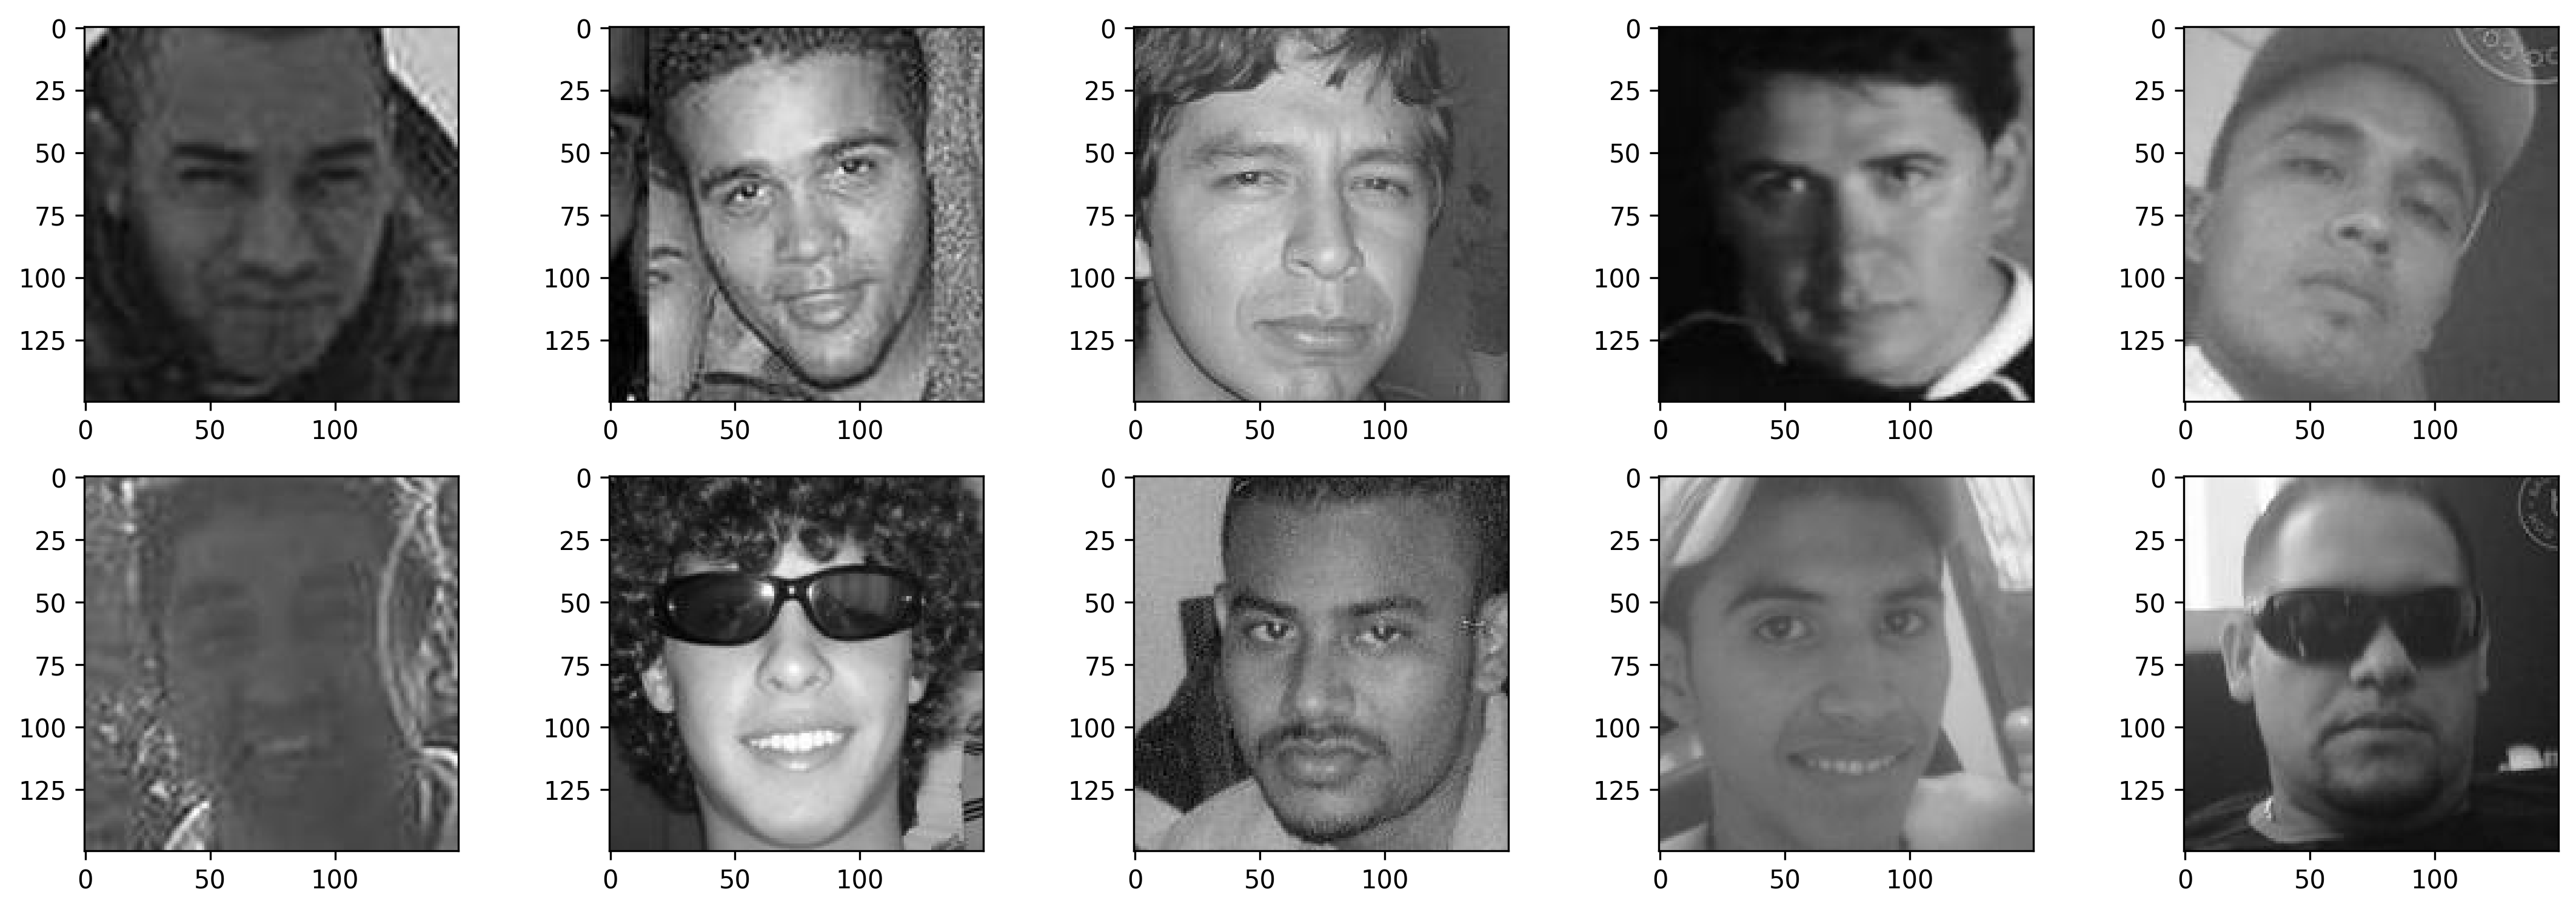

In [19]:
#create figure layout

figure_man, axes = plt.subplots(nrows=2,ncols=5, figsize=[18,6], dpi=300)
axes = axes.ravel()
image_list = os.listdir(man_dir)[:10]

#iterative over image list to add them into figure

for i in range(len(axes)):
    axes[i].imshow(load_img(os.path.join(man_dir,image_list[i])))

plt.show()


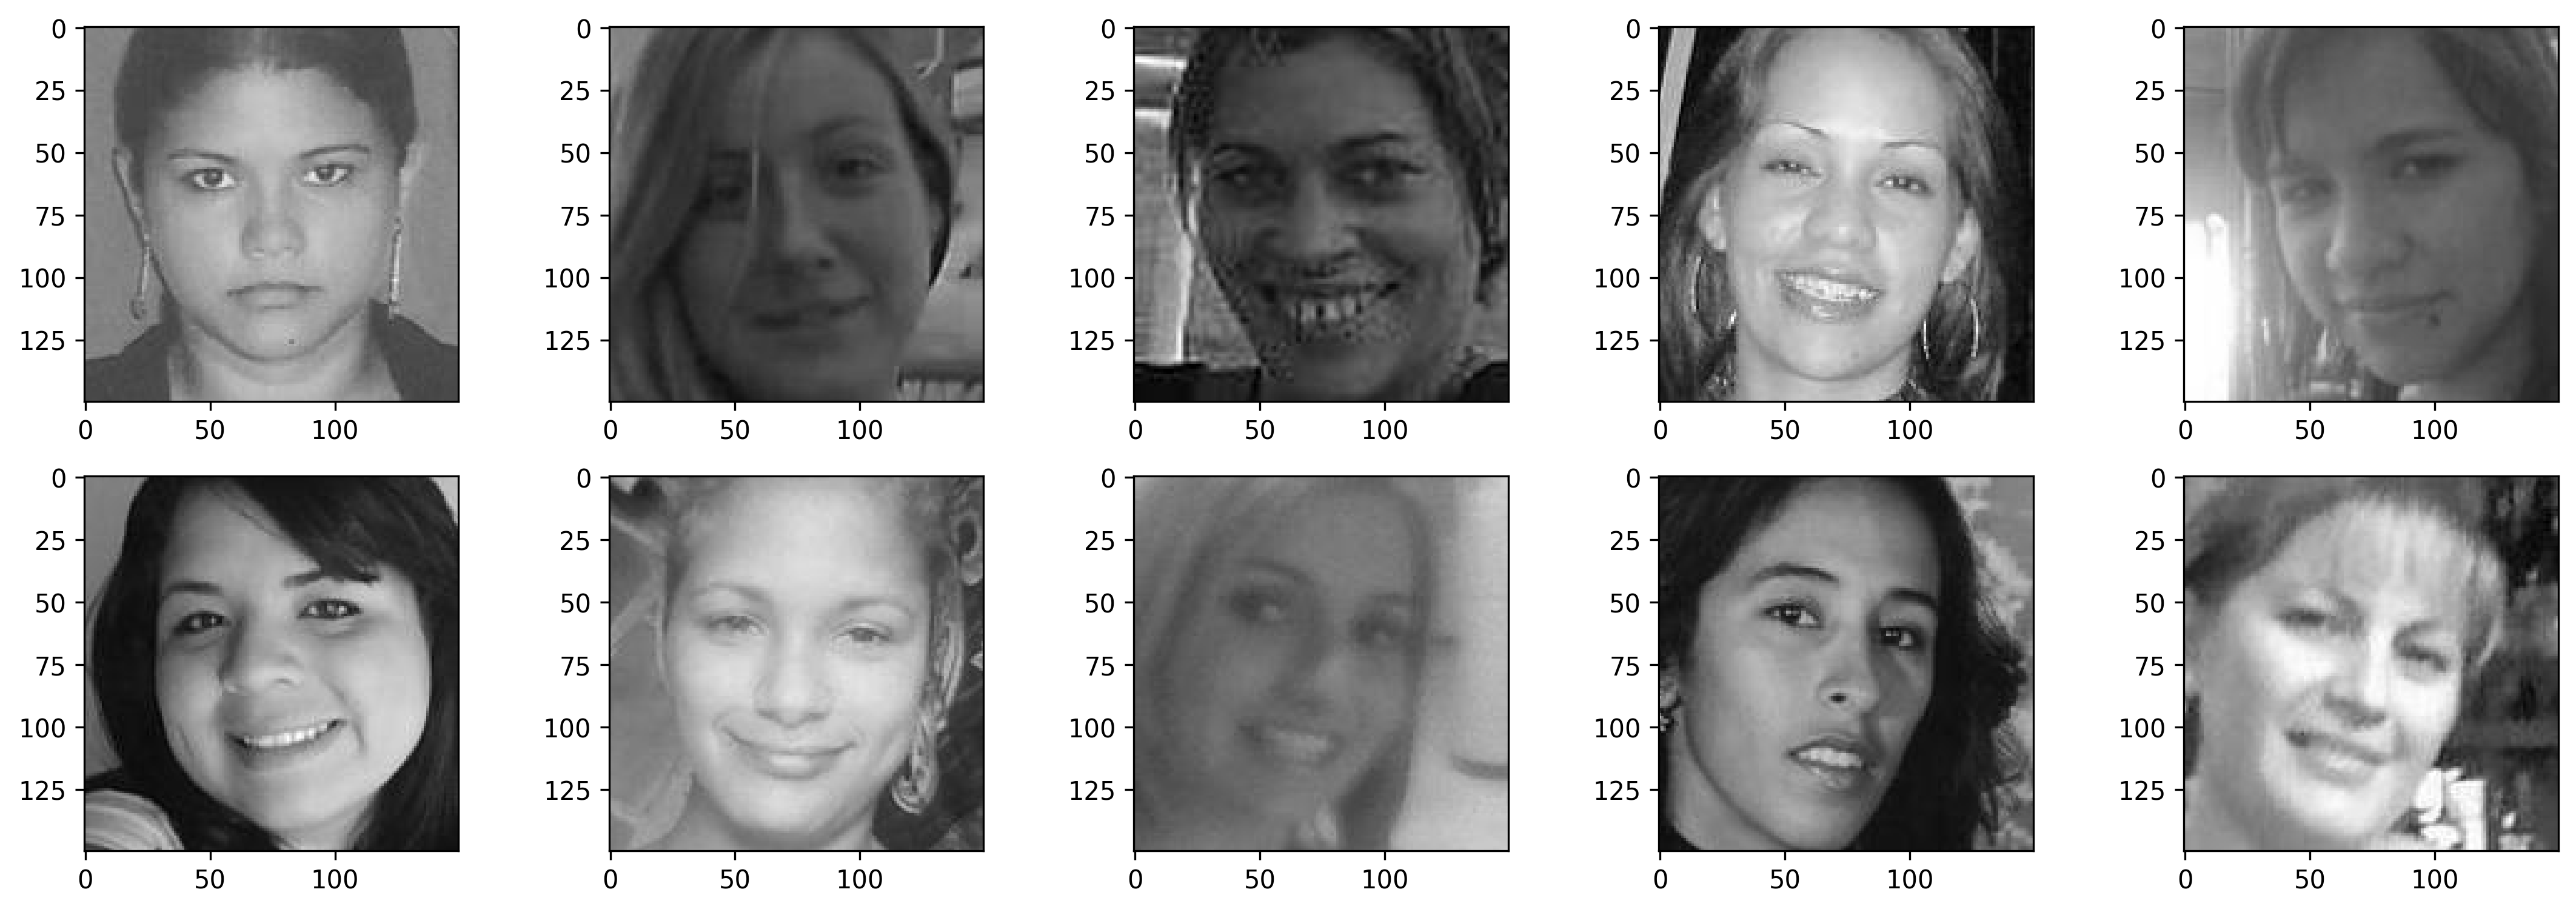

In [20]:
#create figure layout

figure_woman, axes = plt.subplots(nrows=2,ncols=5, figsize=[18,6], dpi=300)
axes = axes.ravel()
image_list = os.listdir(women_dir)[:10]

#iterative over image list to add them into figure

for i in range(len(axes)):
    axes[i].imshow(load_img(os.path.join(women_dir,image_list[i])))

plt.show()

In [23]:
len(os.listdir(man_dir)), len(os.listdir(women_dir))

(2335, 1003)

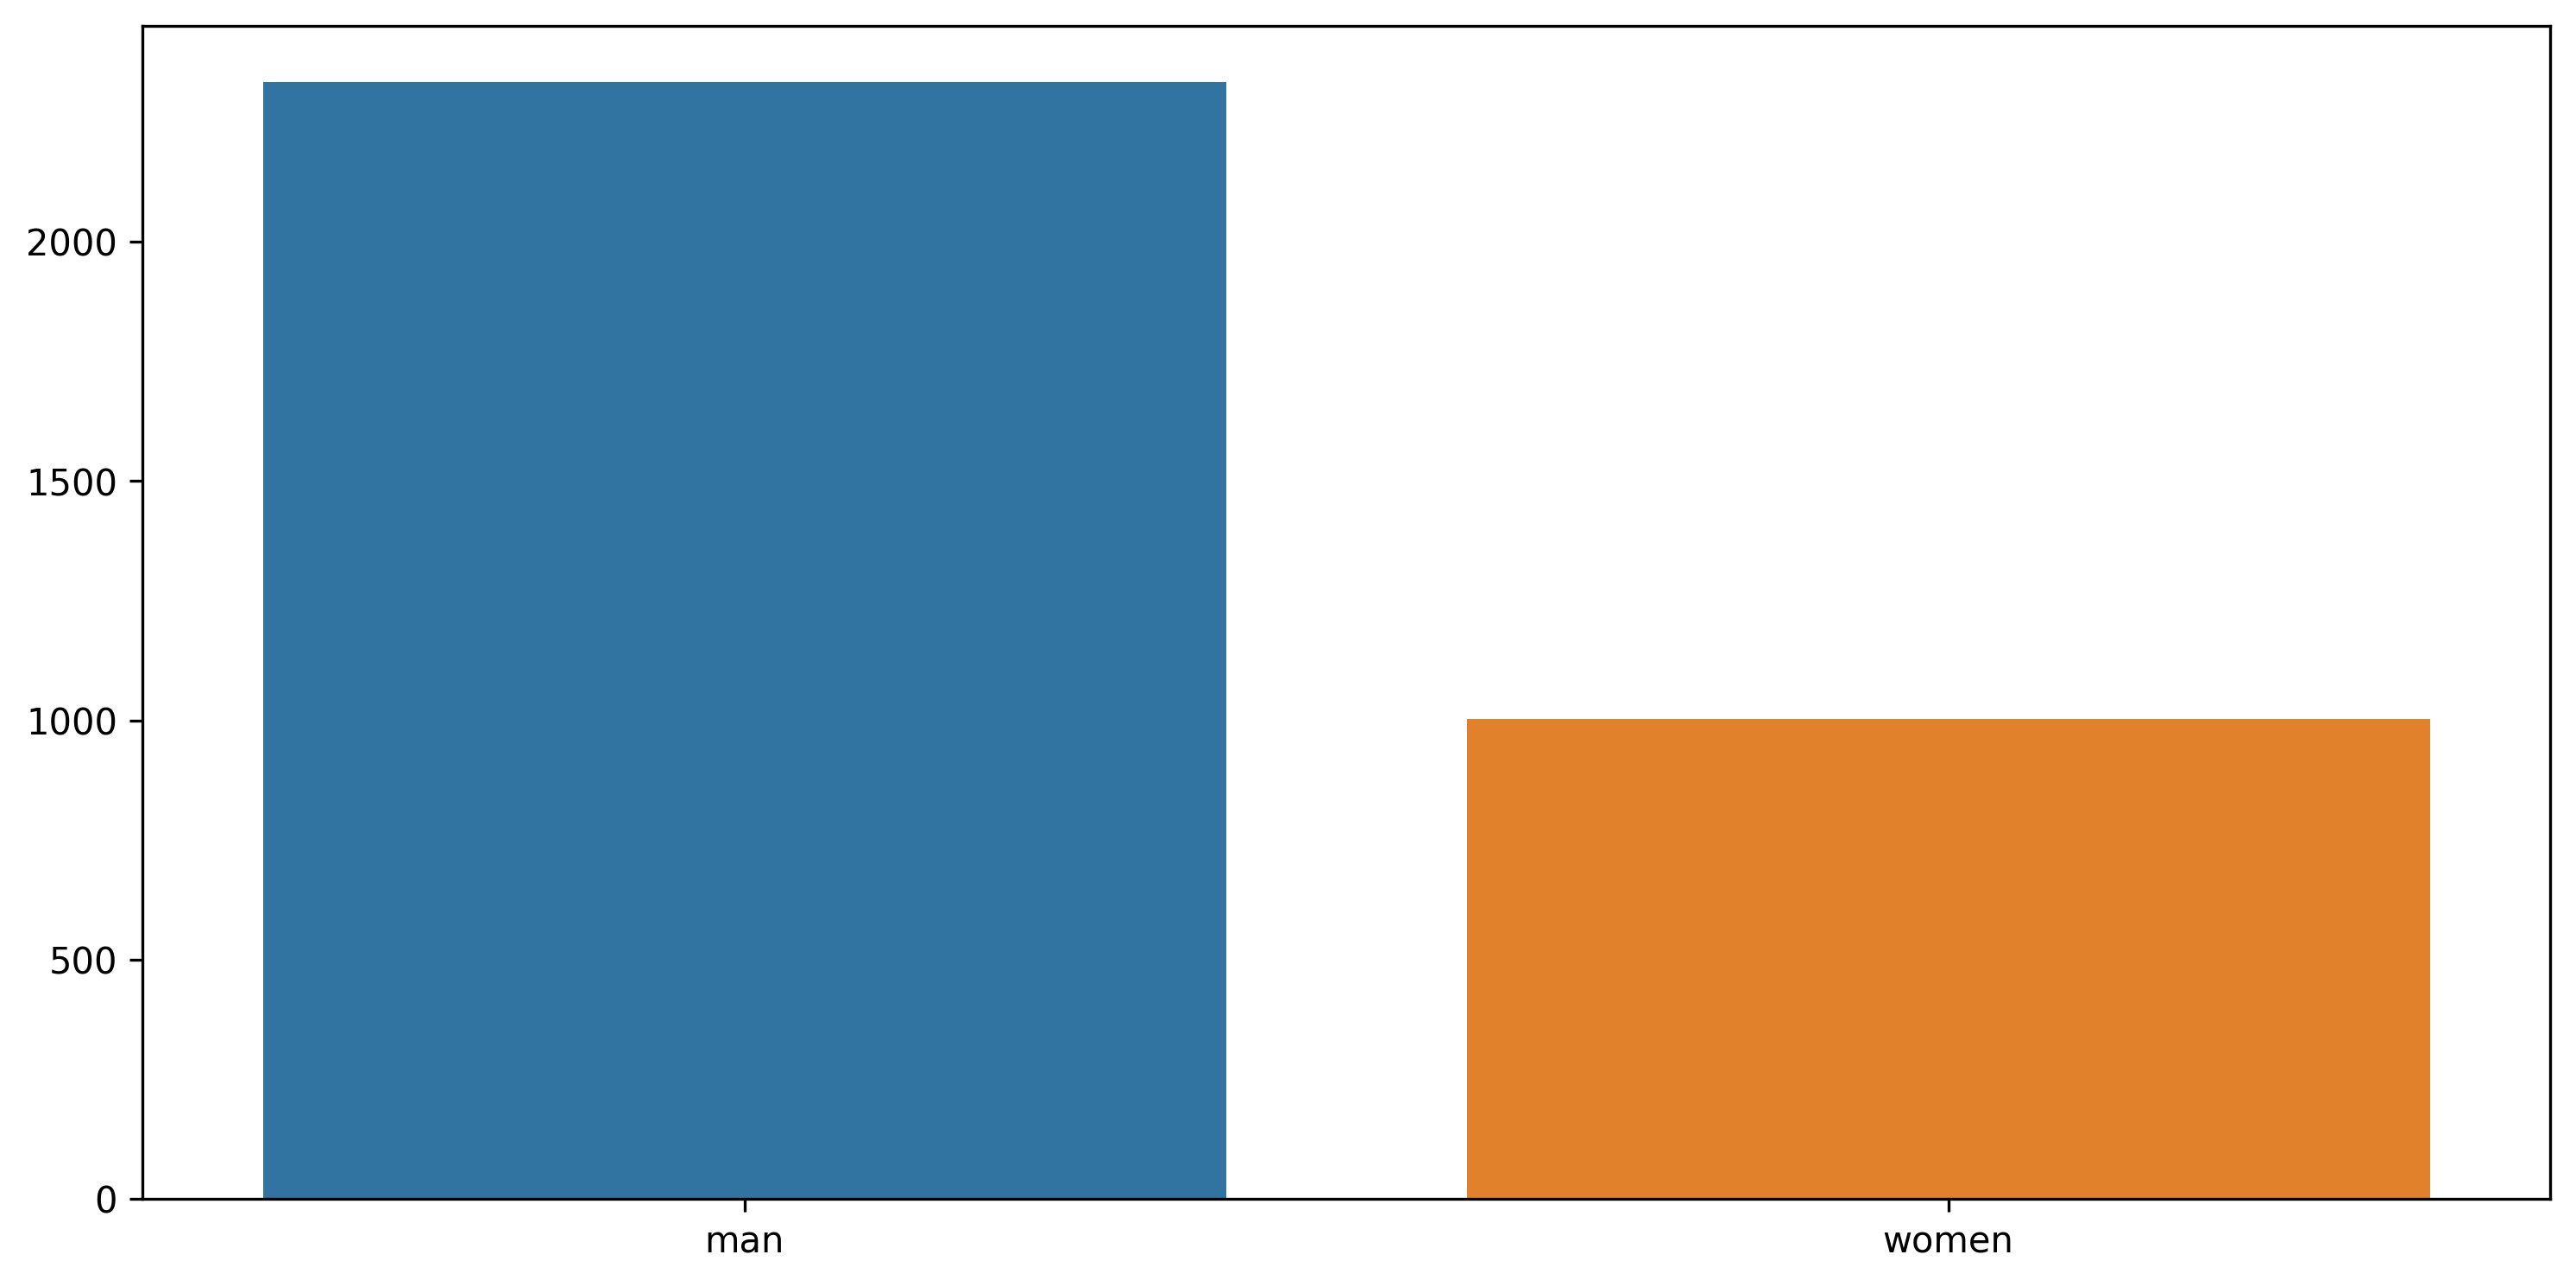

In [25]:
plt.figure(figsize=[12,6], dpi=300)
sns.barplot(x=['man','women'],y=[len(os.listdir(man_dir)), len(os.listdir(women_dir))])

plt.show()

In [29]:
images = []
labels = []

for img in os.listdir(man_dir):
    image_path = os.path.join(man_dir,img)
    image = img_to_array(load_img(path=image_path, target_size=(150,150)))
    images.append(image)
    labels.append(1)

for img in os.listdir(women_dir):
    image_path = os.path.join(women_dir,img)
    image = img_to_array(load_img(path=image_path, target_size=(150,150)))
    images.append(image)
    labels.append(0)

In [30]:
images[0].shape

(150, 150, 3)

In [37]:
train_img, x, train_lbl, y = train_test_split(images, labels, test_size=0.3)
val_img, test_img, val_label, test_label = train_test_split(x,y, test_size=0.1)

In [38]:
len(train_img), len(test_img), len(val_img)

(2336, 101, 901)

In [40]:
model = Sequential()

model.add(InputLayer(input_shape=(150,150,3)))
#convolutional head
model.add(Conv2D(filters=32, kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation=relu))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected
model.add(Dense(units=1024, activation=relu))
model.add(Dense(units=512, activation=relu))
model.add(Dense(units=512,activation=relu))
model.add(Dense(units=1,activation=sigmoid))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0